In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Config

In [2]:
#directory = '/data/project/general/aerosolretriev/aerosol_results_25_08_2022/forward_model/version4'
#directory = '/data/project/general/aerosolretriev/aerosol_results_august_2022/forward_model'
#directory = '/data/project/general/aerosolretriev/aerosol_results_25_08_2022/forward_model2'
#directory = '/data/project/general/aerosolretriev/aerosol_results_ds08/aerosol_results_11_09_2022/forward_model1'

directory = '/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1'

#directory = '/data/project/general/aerosolretriev/aerosol_results_september_2022/forward_model4'

#directory = '/data/project/general/aerosolretriev/aerosol_results_september_2022/forward_model_ASHA/forward_model3'

In [3]:

plot_dir = directory+'/plots'

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [4]:
result_dir = directory 


In [5]:
model_dir =  directory + '/models'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [6]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1/models'

# Load data

In [7]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [8]:
config_columns = [col for col in df.columns if col.startswith('config/') if col.replace('config/', '') != 'datafile']
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [9]:
df['config/datafile'].loc[0]

'/data/project/general/aerosolretriev/aerosol_data/dataset_01_12_2022/data_all_train_iv10.h5'

In [10]:
df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

# Plot

## Generalisation of adjusted $R^2$

In [11]:
r2_val = 'r2_sklearn_val'
r2_train = 'r2_sklearn_train'

r2_val = 'r2_val'
r2_train = 'r2_train'

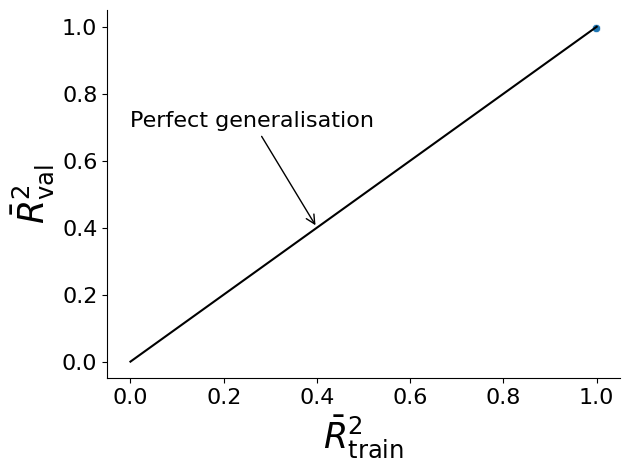

In [12]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

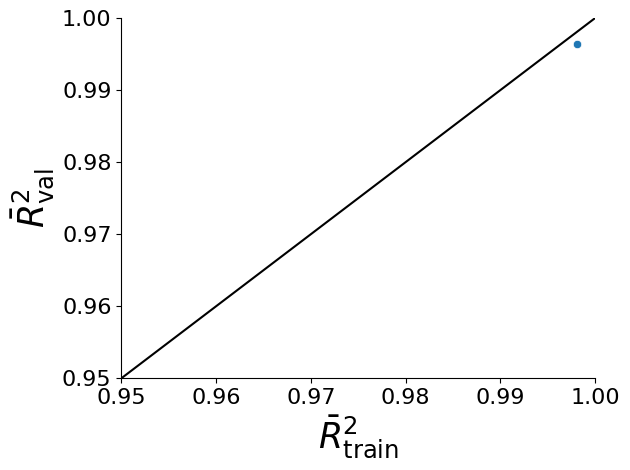

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0.6, 1.], [0.6, 1.], color='black')
ax.annotate(xy=(0.4, 0.4),
            xytext=(0.0, 0.7),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim(0.95,1)
ax.set_ylim(0.95,1)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

## Relationship between $R^2$ and rel. error

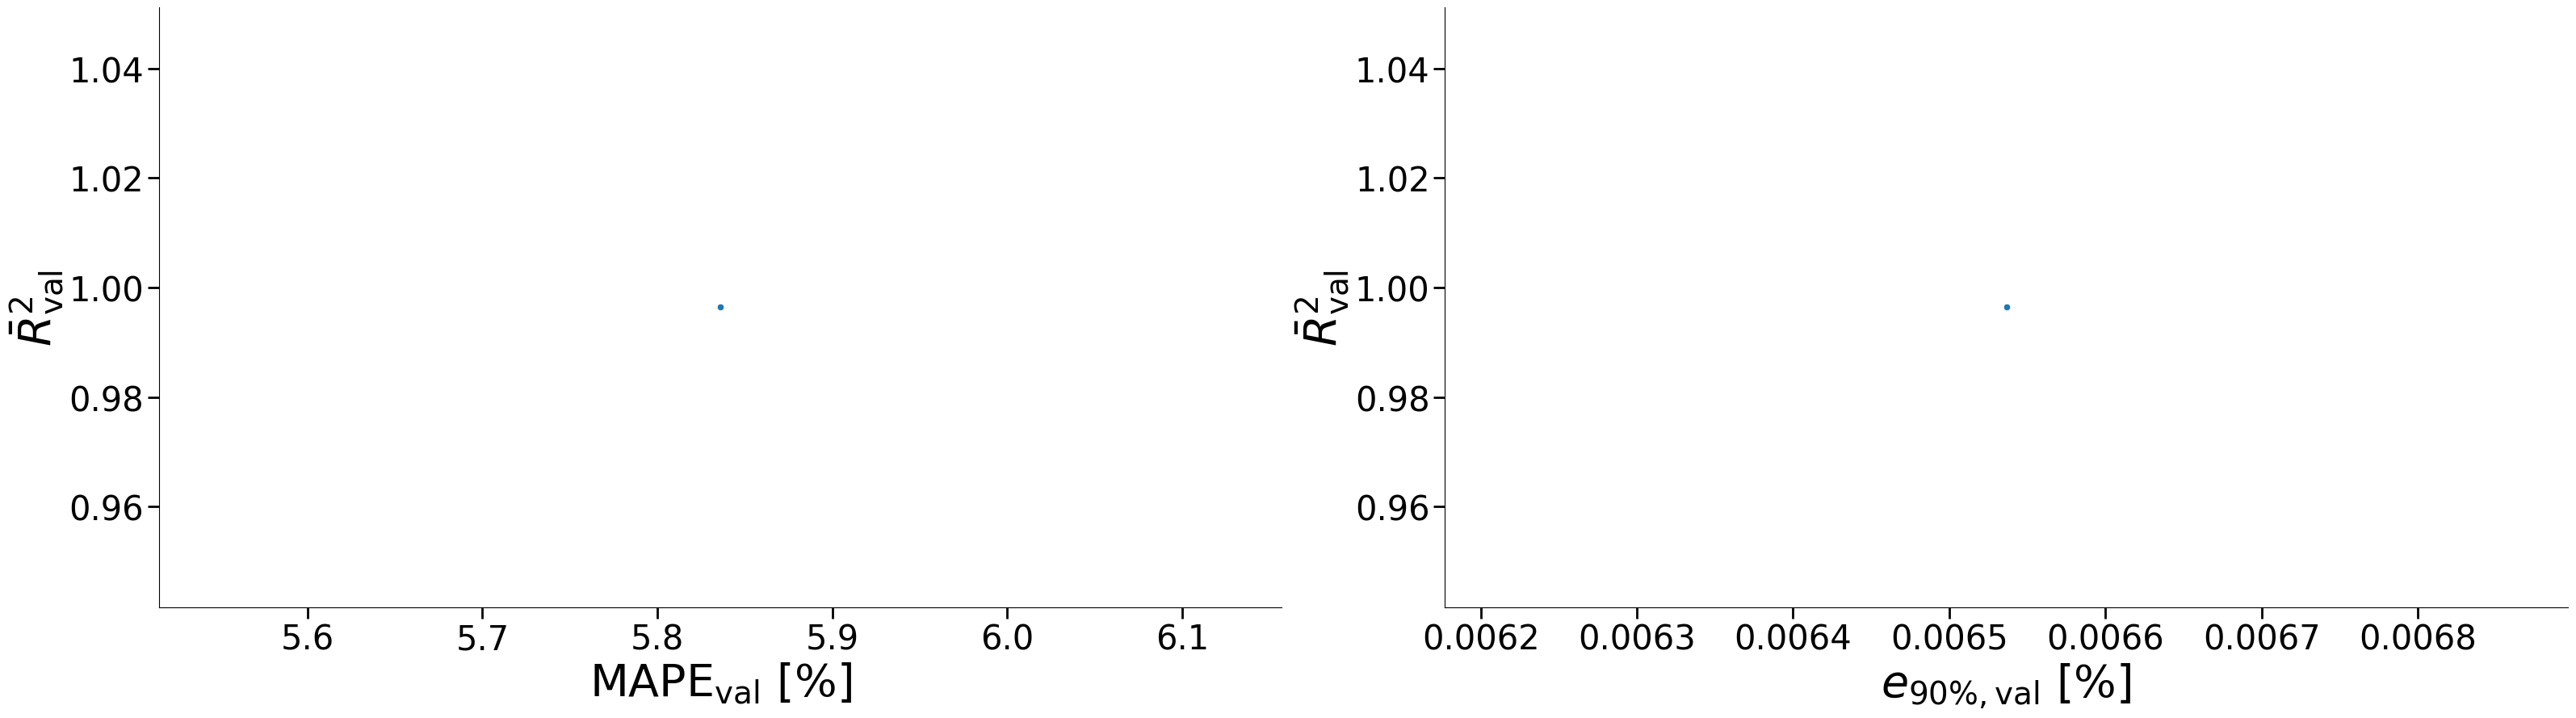

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(32, 9))

ax = axes[0]
#sns.scatterplot(data=df, x='MAPE_sklearn_val', y=r2_val, ax=ax)
sns.scatterplot(data=df, x='MAPE_val', y=r2_val, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

ax = axes[1]
#sns.scatterplot(data=df, x='MAE_sklearn_val', y=r2_val, ax=ax)
sns.scatterplot(data=df, x='MAE_val', y=r2_val, ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]', fontsize=40)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=40)

for ax in axes:
    ax.tick_params(labelsize=30, width=2, length=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

## Execution time vs. batch size

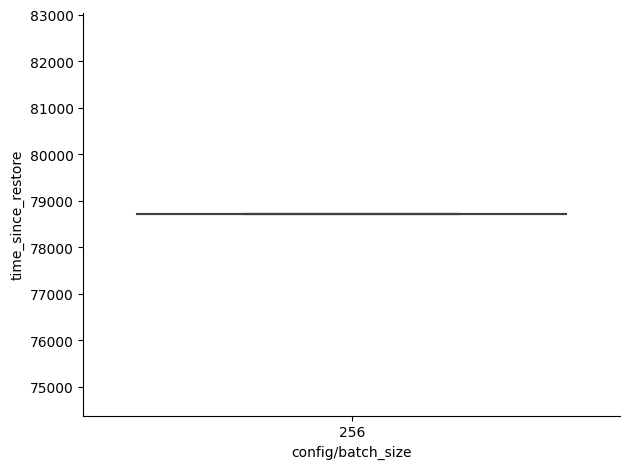

In [15]:
fig, ax = plt.subplots()

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/time_vs_batch_size')

## Dependence on the parameters

In [16]:
y_lim = [0.995, 1.005]
#y_lim = [0., 1.]

In [17]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [18]:
to_plot = df[config_columns + [r2_val]].rename(columns=config_column_labels)

In [19]:
to_plot_ow =to_plot.copy()

In [20]:
to_plot_ow

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      6     100        0.00005  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  
0    120    0.001  0.996394

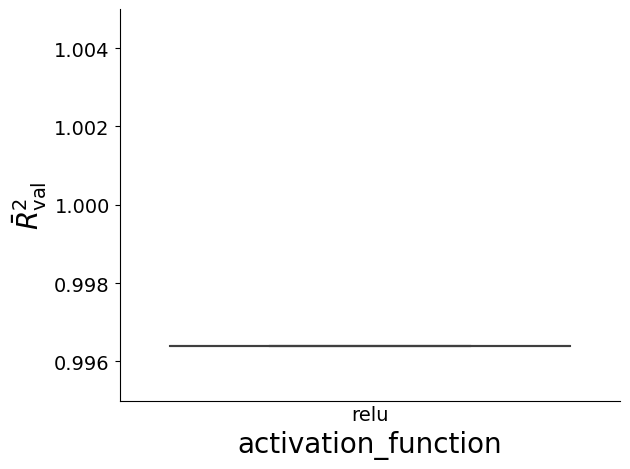

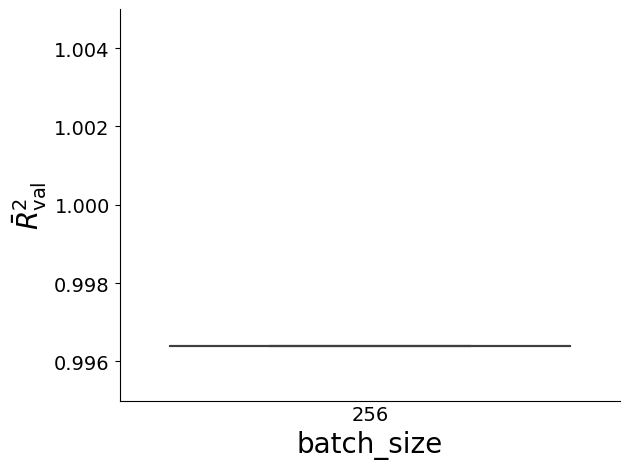

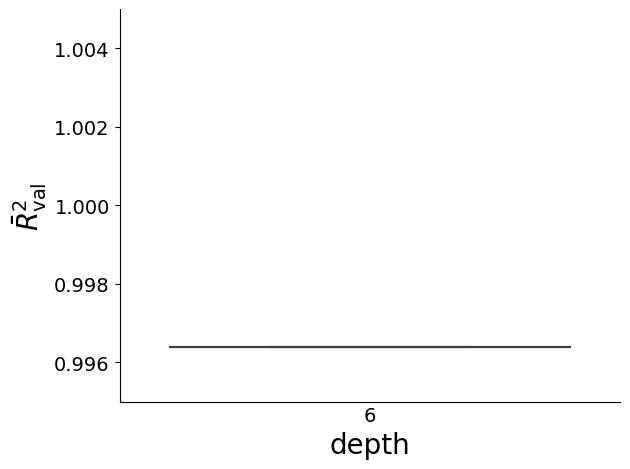

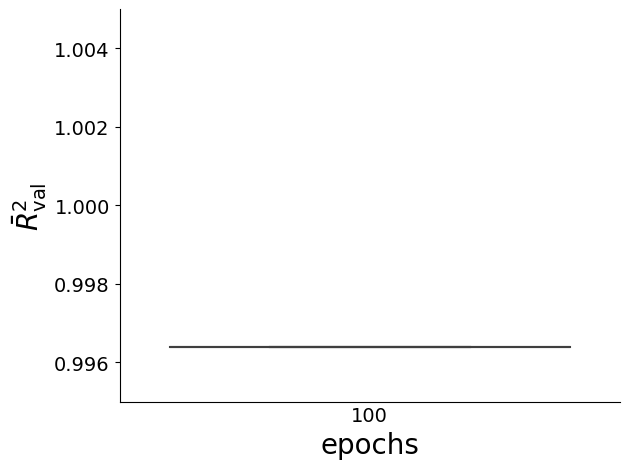

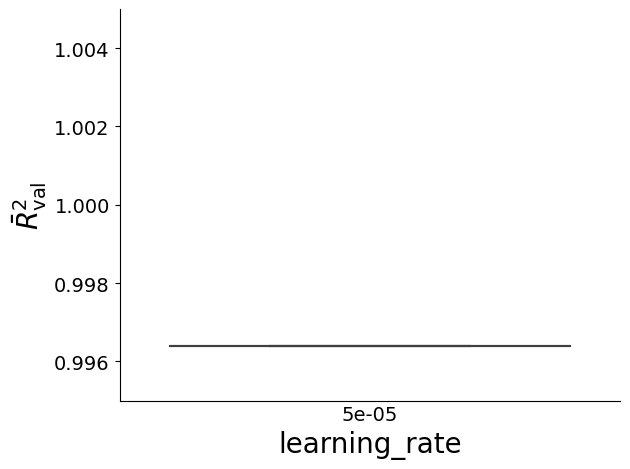

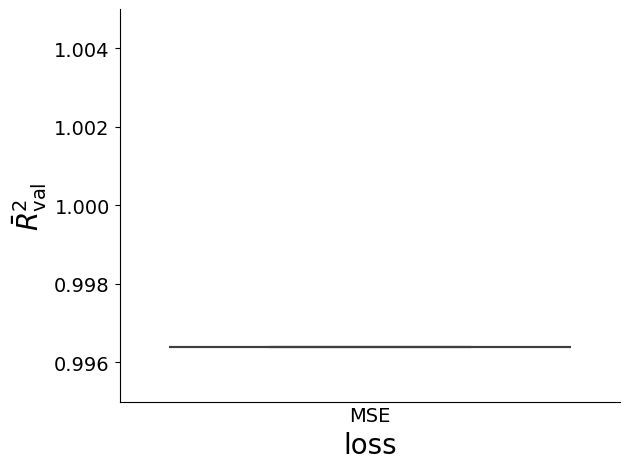

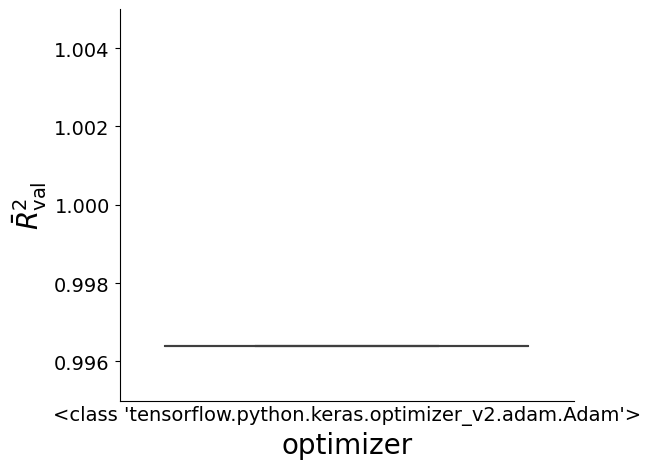

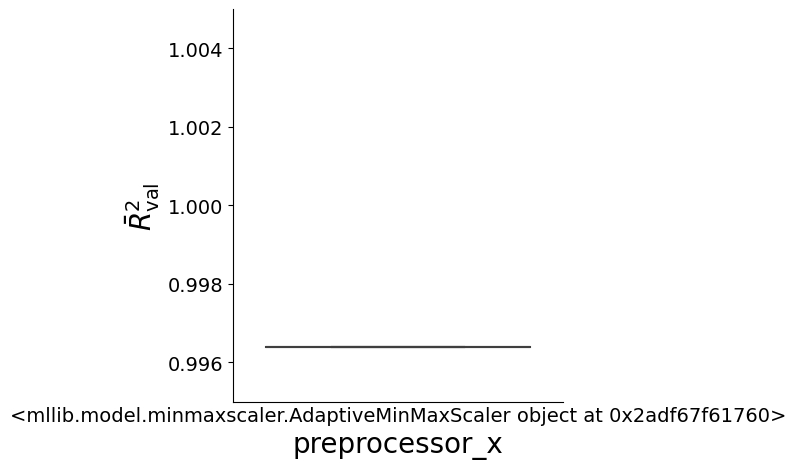

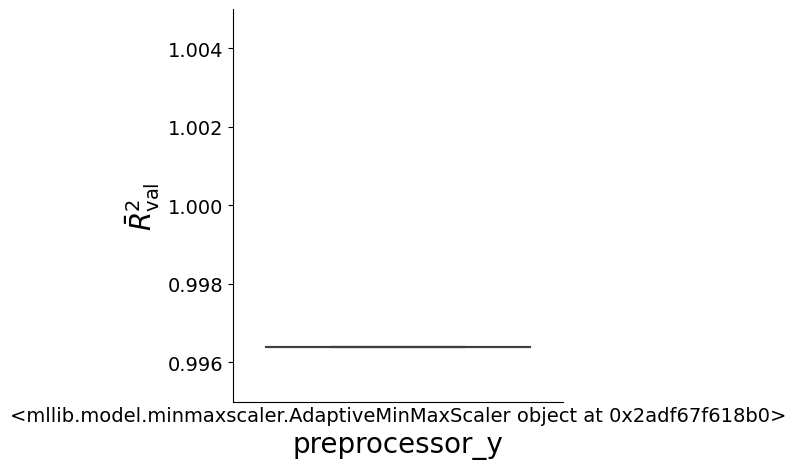

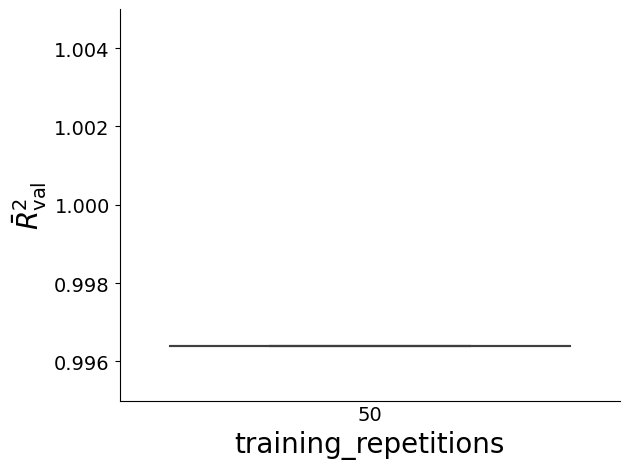

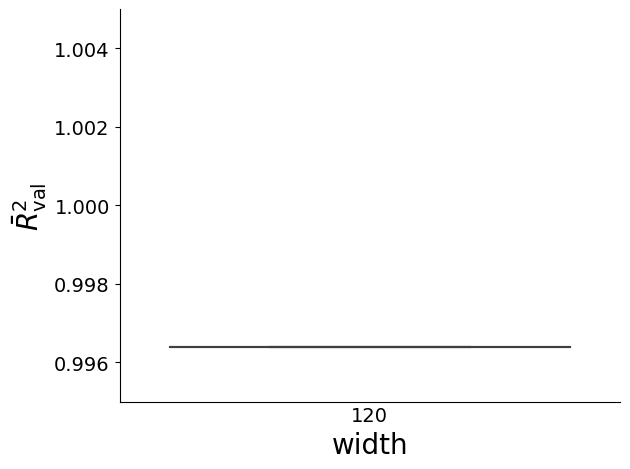

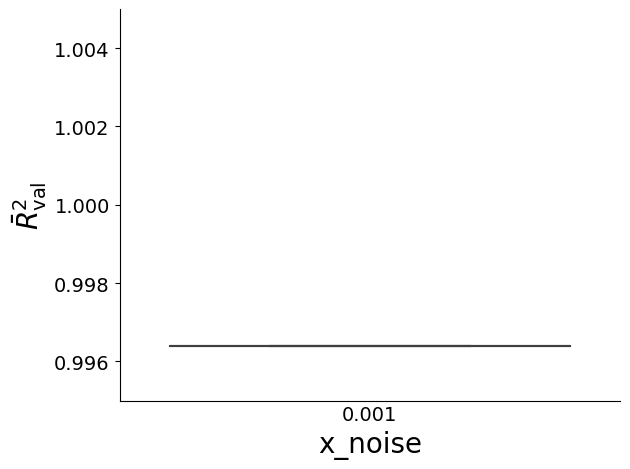

In [21]:
for param in to_plot.columns:
    if param == r2_val:
        continue

    fig, ax = plt.subplots()

    sns.boxplot(data=to_plot, x=param, y=r2_val, color=sns.color_palette()[0])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(y_lim)
    ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)
    #ax.grid(True, axis='y')
    
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/dependence_on_{param}.jpg')

In [22]:
config_columns

['config/activation_function',
 'config/batch_size',
 'config/depth',
 'config/epochs',
 'config/learning_rate',
 'config/loss',
 'config/optimizer',
 'config/preprocessor_x',
 'config/preprocessor_y',
 'config/training_repetitions',
 'config/width',
 'config/x_noise']

In [23]:
df[config_columns + [r2_val]]

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                       relu                256             6            100   

   config/learning_rate config/loss  \
0               0.00005         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise    r2_val  
0                           50           120           0.001  0.996394

In [24]:
#g = sns.pairplot(data=df[config_columns + ['r2_adj_val']], hue='r2_adj_val', diag_kind='hist', corner=True)

In [25]:
len(config_columns)

12

In [26]:
len(config_column_labels)

12

In [27]:
to_plot = df[config_columns + [r2_val]].copy()
to_plot[r2_val], bins = pd.cut(df[r2_val], 5, retbins=True)
mean_points = [(bins[i] + bins[i-1]) / 2. for i in range(1, len(bins))]
to_plot[r2_val] = pd.cut(df[r2_val], 5, retbins=False, labels=mean_points)

In [28]:
to_plot[r2_val]


/data/user/boiger_r/python_env/aerosol_mieNN/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


0    0.996394
Name: r2_val, dtype: category
Categories (5, float64): [0.995597 < 0.995996 < 0.996394 < 0.996793 < 0.997191]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


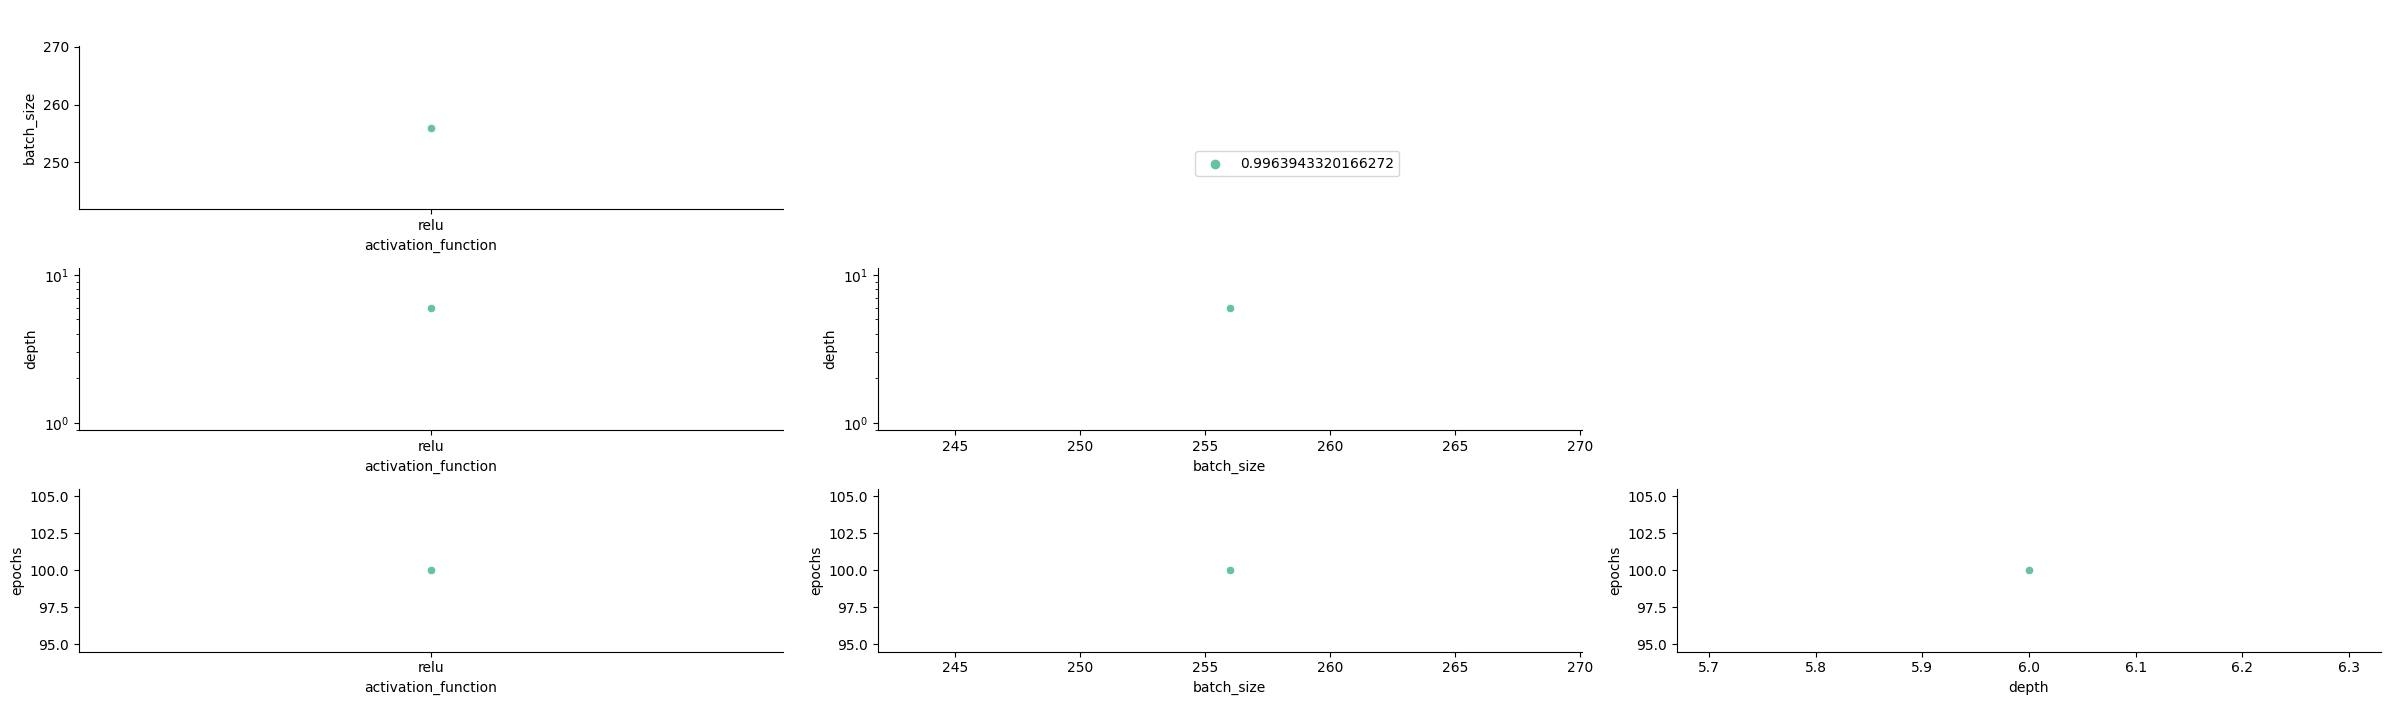

In [29]:
n_row = 4
n_col = 4
cols = config_columns

colors = sns.color_palette("BuGn_r", n_colors=len(to_plot[r2_val].unique()))
colors.reverse()

fig, axes = plt.subplots(n_row, n_col, figsize=(32, 9))
legend = True

for i in range(n_row):
    for j in range(n_col):
        ax = axes[i, j]
        if j >= i:
            ax.remove()
            continue
        sns.scatterplot(data=to_plot,
                        x=cols[j],
                        y=cols[i],
                        hue=to_plot[r2_val].tolist(),
                        palette=colors,
                        legend='brief' if legend else False,
                        ax=ax)
        if legend:
            legend = False

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(config_column_labels[config_columns[j]])
        ax.set_ylabel(config_column_labels[config_columns[i]])
        ax.legend().remove()
fig.tight_layout()
fig.legend(loc=(0.5, 0.75))

axes[2, 0].set_yscale('log')
axes[2, 1].set_yscale('log')

# Best configs

In [30]:
best_config = df.sort_values(r2_val, ascending=False).iloc[0, :]

In [31]:
df.sort_values(r2_val, ascending=False)[config_columns + [r2_val,r2_train]].rename(columns=config_column_labels).head(20)#,'r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val','r2_val']].rename(columns=config_column_labels).head(20)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      6     100        0.00005  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  r2_train  
0    120    0.001  0.996394   0.99813

In [32]:
best_config.name

0

In [33]:
best_config['trial_id']

'1cfd2_00000'

# Worst configs

In [34]:
df.sort_values(r2_val, ascending=True)[config_columns + [r2_val, r2_train]].rename(columns=config_column_labels).head(5)# ['r2_adj_val', 'MAPE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function  batch_size  depth  epochs  learning_rate loss  \
0                relu         256      6     100        0.00005  MSE   

                                           optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                                      preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                                      preprocessor_y  training_repetitions  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...                    50   

   width  x_noise    r2_val  r2_train  
0    120    0.001  0.996394   0.99813

In [35]:
df

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.00644  0.006537    6.459488  5.836035   0.000166  0.000197   

   median_percentile_max_error_train  median_percentile_max_error_val  \
0                          16.683731                        16.647465   

   90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                     457.510934                   462.268346  ...   

   config/epochs  config/learning_rate  config/loss  \
0            100               0.00005          MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise  \
0                           50           120           0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

# Copy the best model to the models directory

In [36]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'
best_model_dir = f'{best_config["logdir"]}'

In [37]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1/models'

In [38]:
shutil.copytree(best_model_dir, f'{model_dir}/forward_model')

FileExistsError: [Errno 17] File exists: '/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1/models/forward_model'

In [39]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1/models'

# Closer look w. r. t. overfitting

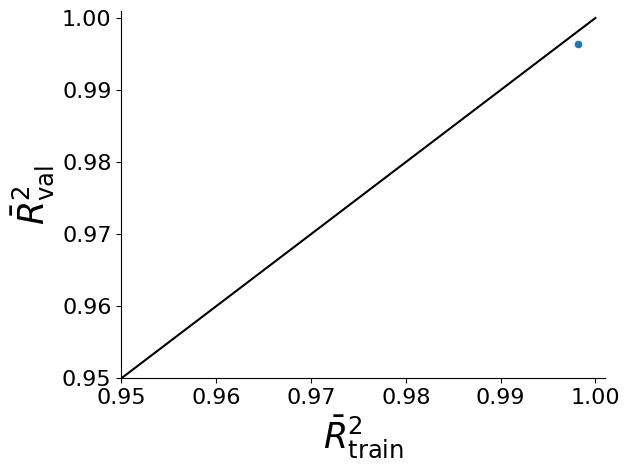

In [40]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x=r2_train, y=r2_val, ax=ax)
ax.plot([0., 1.], [0., 1.], color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0.95, 1.001])
ax.set_ylim([0.95, 1.001])

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [41]:
df[df[r2_train] > 0.95]

MAE_train   MAE_val  MAPE_train  MAPE_val  MSE_train   MSE_val  \
0    0.00644  0.006537    6.459488  5.836035   0.000166  0.000197   

   median_percentile_max_error_train  median_percentile_max_error_val  \
0                          16.683731                        16.647465   

   90_percentile_max_error_train  90_percentile_max_error_val  ...  \
0                     457.510934                   462.268346  ...   

   config/epochs  config/learning_rate  config/loss  \
0            100               0.00005          MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise  \
0                           50           120           0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

In [42]:
# LOad history of best config

In [43]:
best_model_folder = best_config['trial_id']

In [44]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1'

In [45]:
best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)

In [46]:
best_model_hist

MAE_train   MAE_val  MAPE_train   MAPE_val  MSE_train   MSE_val  \
0    0.019823  0.019802   28.463668  22.138523   0.001649  0.001650   
1    0.016419  0.016395   17.059109  14.283847   0.001052  0.001061   
2    0.014002  0.014037   17.943923  13.234113   0.000761  0.000778   
3    0.012041  0.012071   13.390469  11.165947   0.000597  0.000613   
4    0.010796  0.010831   13.373179  11.197198   0.000508  0.000523   
5    0.011412  0.011446   14.315763  11.740579   0.000499  0.000516   
6    0.010285  0.010330   12.465704  10.088548   0.000436  0.000455   
7    0.010395  0.010437   11.210897  10.785063   0.000413  0.000432   
8    0.010462  0.010518    9.954470   9.762411   0.000422  0.000441   
9    0.009809  0.009846   12.390745   8.686759   0.000363  0.000380   
10   0.009173  0.009219    9.514692   9.287590   0.000336  0.000353   
11   0.008712  0.008764    9.947289   8.498803   0.000314  0.000332   
12   0.008744  0.008791   10.106183   8.433345   0.000308  0.000326   
13   0.008784  0.008837   13.189389   8.151789   0.000299  0.000318   
14   0.008171  0.008224   10.790662   7.836015   0.000280  0.000298   
15   0.007636  0.007688   11.263562   7.883051   0.000259  0.000277   
16   0.007774  0.007828   11.975787   7.563302   0.000256  0.000276   
17   0.007938  0.007989   13.058497   7.893742   0.000255  0.000274   
18   0.009153  0.009215    9.717885   8.449144   0.000289  0.000308   
19   0.008371  0.008421   12.142681   8.515814   0.000264  0.000283   
20   0.007820  0.007879   10.769497   7.863273   0.000241  0.000262   
21   0.007813  0.007871   11.533061   7.342714   0.000237  0.000258   
22   0.007381  0.007449    9.631320   7.176677   0.000229  0.000250   
23   0.006843  0.006906    9.237802   6.701714   0.000208  0.000229   
24   0.007488  0.007544    9.392011   7.445699   0.000222  0.000244   
25   0.008151  0.008231    7.328335   7.538226   0.000248  0.000272   
26   0.007615  0.007695    7.957940   7.446934   0.000220  0.000242   
27   0.007487  0.007540    9.251596   7.430181   0.000212  0.000233   
28   0.007885  0.007962    7.753236   7.395514   0.000226  0.000249   
29   0.006691  0.006763    7.344943   6.195413   0.000190  0.000214   
30   0.006911  0.006981    8.056518   6.656336   0.000194  0.000218   
31   0.007028  0.007110    8.112478   7.167881   0.000199  0.000223   
32   0.007221  0.007289    6.922644   6.632722   0.000196  0.000220   
33   0.006555  0.006628    8.556355   6.695026   0.000186  0.000210   
34   0.006448  0.006520    6.843666   6.707623   0.000179  0.000204   
35   0.008604  0.008686   10.643447   7.467128   0.000243  0.000269   
36   0.006387  0.006471    7.706920   6.457620   0.000172  0.000200   
37   0.008208  0.008299   11.206351   7.357305   0.000225  0.000252   
38   0.006285  0.006370    9.222571   6.391975   0.000170  0.000197   
39   0.006484  0.006571    8.834530   6.835964   0.000176  0.000205   
40   0.006645  0.006725    8.851061   6.532158   0.000176  0.000204   
41   0.006113  0.006201    8.147881   6.108632   0.000165  0.000194   
42   0.006665  0.006747    8.514767   6.709346   0.000175  0.000204   
43   0.006980  0.007064    9.234529   6.372416   0.000186  0.000216   
44   0.006676  0.006761   10.140339   6.424206   0.000175  0.000203   
45   0.005845  0.005935    8.376574   5.902240   0.000155  0.000184   
46   0.006832  0.006919    9.752566   6.668340   0.000176  0.000207   
47   0.005871  0.005960    8.618867   5.724597   0.000154  0.000185   
48   0.006281  0.006370    8.471507   5.669230   0.000159  0.000189   
49   0.006440  0.006537    6.459488   5.836035   0.000166  0.000197   

    median_percentile_max_error_train  median_percentile_max_error_val  \
0                           62.739512                        62.559625   
1                           45.521430                        45.258926   
2                           38.690160                        38.549773   
3                           33.751154                        33.395042   
4           

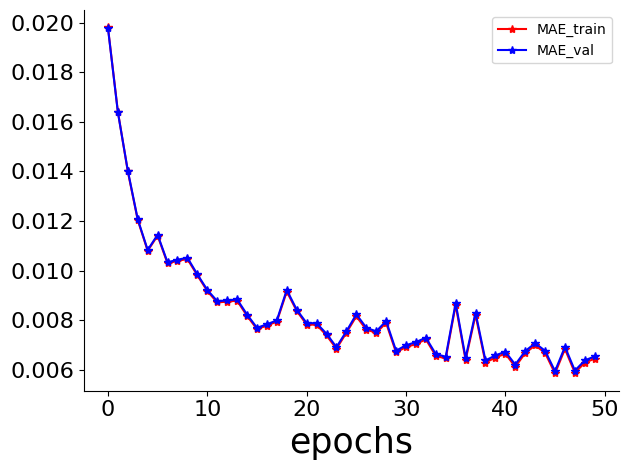

In [47]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()


In [48]:
best_model_hist.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id'],
      dtype='object')

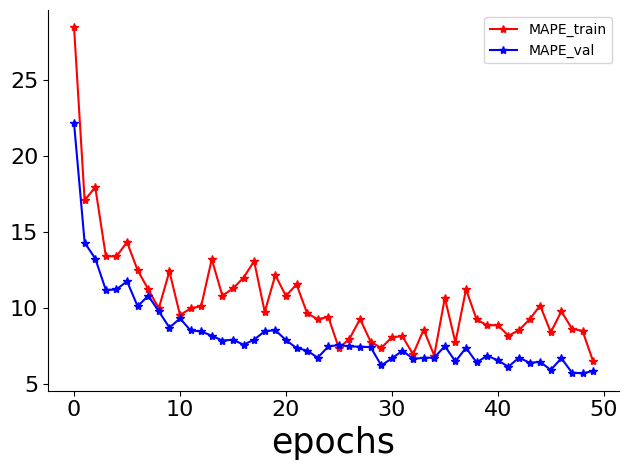

In [49]:
fig, ax = plt.subplots()

ax.plot(best_model_hist['MAPE_train'],'r*-', label = 'MAPE_train')
ax.plot(best_model_hist['MAPE_val'],'b*-',label =  'MAPE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()
fig.tight_layout()

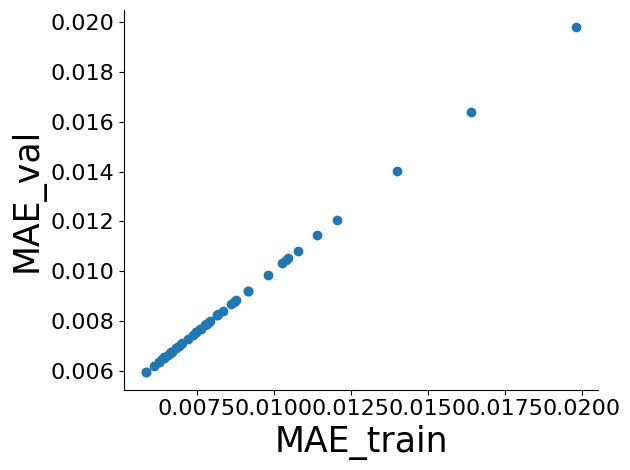

In [50]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['MAE_train'],best_model_hist['MAE_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

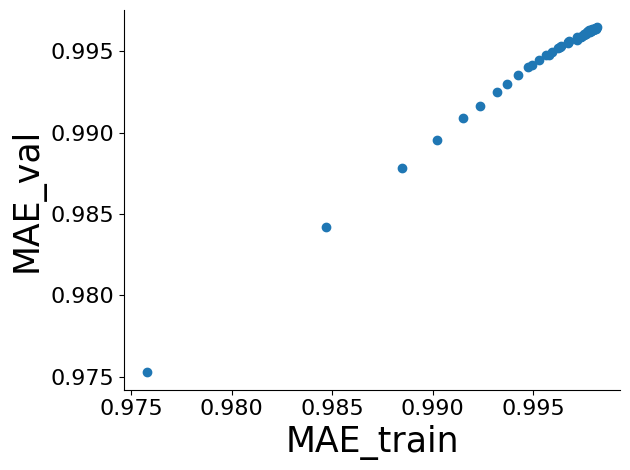

In [51]:
fig, ax = plt.subplots()


ax.scatter(best_model_hist['r2_train'],best_model_hist['r2_val'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('MAE_train', fontsize=25)
ax.set_ylabel('MAE_val', fontsize=25)

ax.tick_params(labelsize=16)
fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_generalisation.jpg')

In [52]:
to_plot

config/activation_function  config/batch_size  config/depth  config/epochs  \
0                       relu                256             6            100   

   config/learning_rate config/loss  \
0               0.00005         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

   config/training_repetitions  config/width  config/x_noise    r2_val  
0                           50           120           0.001  0.996394

In [53]:
to_plot_ow.columns

Index(['activation_function', 'batch_size', 'depth', 'epochs', 'learning_rate',
       'loss', 'optimizer', 'preprocessor_x', 'preprocessor_y',
       'training_repetitions', 'width', 'x_noise', 'r2_val'],
      dtype='object')

In [54]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1/models'

# create overview plot

In [55]:
best_config['config/datafile']

'/data/project/general/aerosolretriev/aerosol_data/dataset_01_12_2022/data_all_train_iv10.h5'

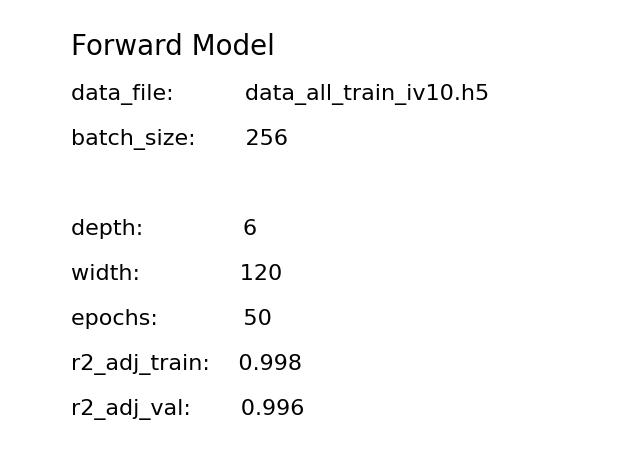

In [56]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='Forward Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='data_file:          ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='batch_size:       ' +str(best_config['config/batch_size']),fontsize=16)
#ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='learning_rate:  '+str(best_config['config/lr']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='depth:              '+str(best_config['config/depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='width:              '+str(best_config['config/width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:            '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:       '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_model_description.jpg',bbox_inches='tight')

1 0
1 1
1 2
2 0


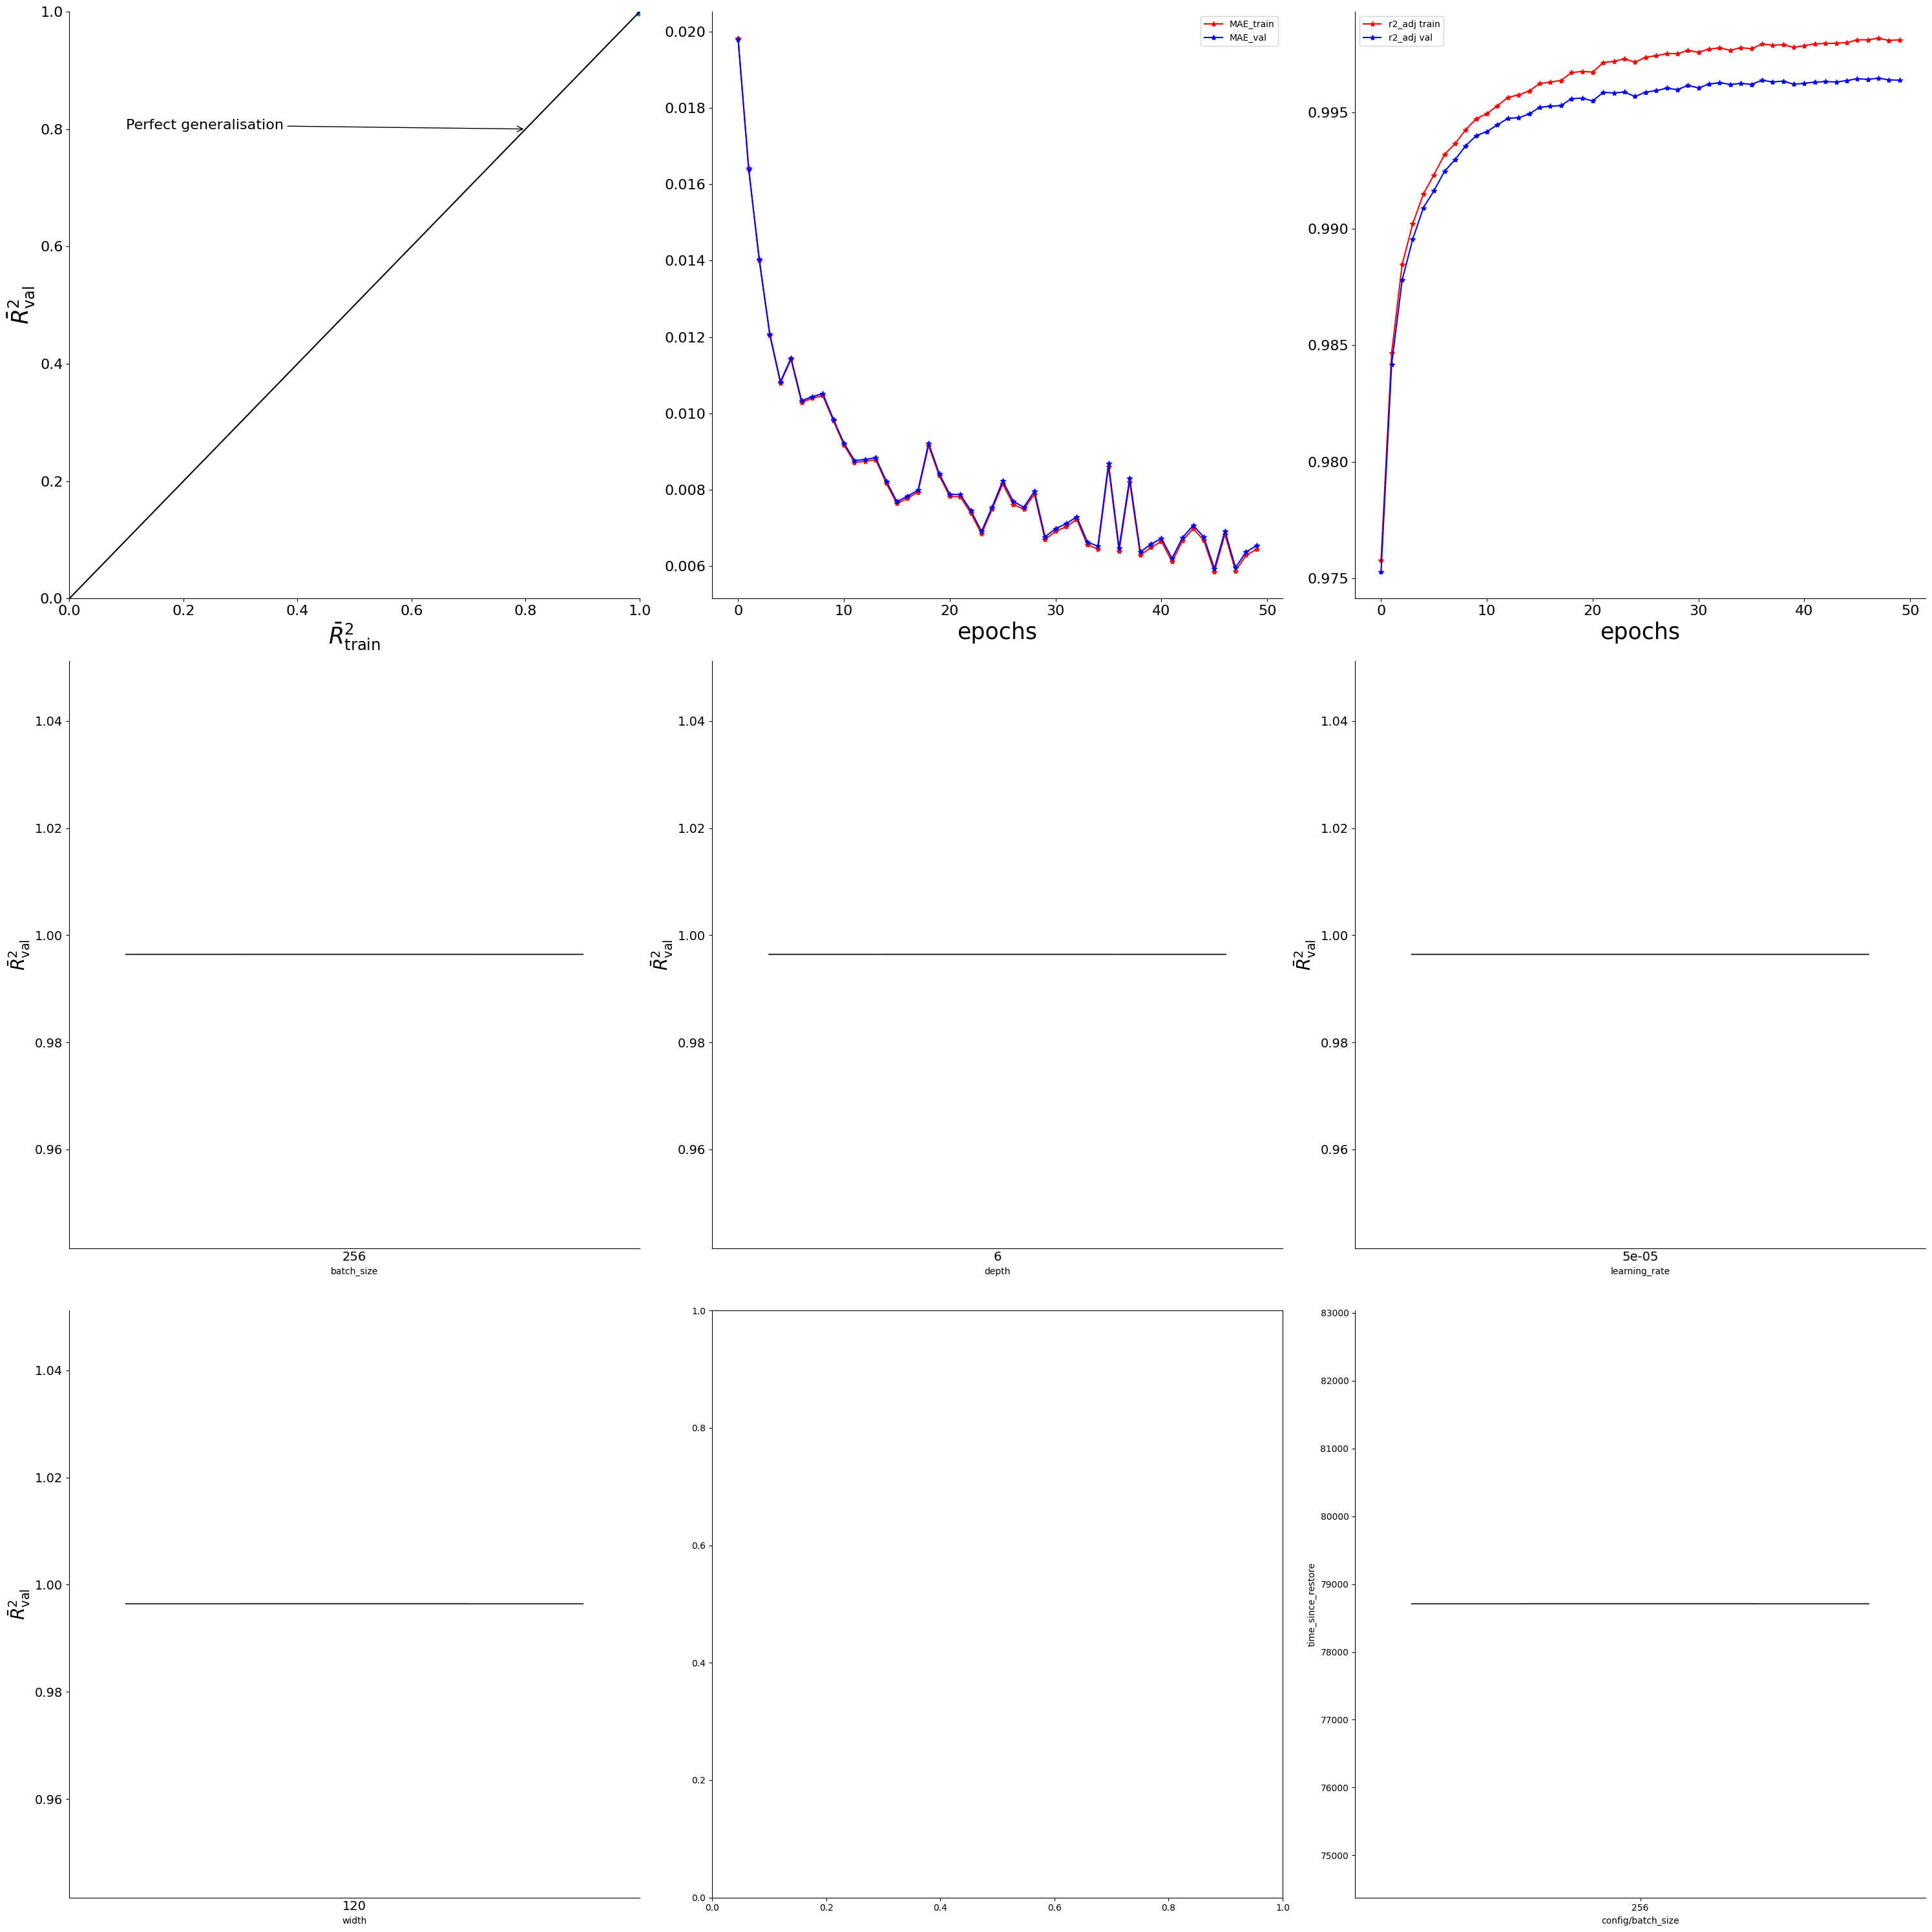

In [57]:
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

ax= axes[0,0]
sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
ax.annotate(xy=(0.8, 0.8),
            xytext=(0.1, 0.8),
            text='Perfect generalisation',
            fontsize=16,
            arrowprops={
                'arrowstyle': '->'
            })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\bar{R}^2_\mathrm{train}$', fontsize=25)
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=25)
ax.tick_params(labelsize=16)
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])


ax = axes[0,1]
ax.plot(best_model_hist['MAE_train'],'r*-', label = 'MAE_train')
ax.plot(best_model_hist['MAE_val'],'b*-',label =  'MAE_val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()

ax = axes[0,2]

ax.plot(best_model_hist['r2_adj_train'],'r*-', label = 'r2_adj train')
ax.plot(best_model_hist['r2_adj_val'],'b*-',label =  'r2_adj val')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('epochs', fontsize=25)
ax.tick_params(labelsize=16)
ax.legend()


axeslist= [[1,0],[1,1],[1,2],[2,0],[2,1]]
i = 0

plot_columns_list = ['batch_size', 'depth', 'learning_rate', 'width']

for param in plot_columns_list:
    if param == 'r2_val':
        continue
    ax = axes[axeslist[i][0],axeslist[i][1]]
    print(axeslist[i][0],axeslist[i][1])
    i = i+1
    sns.boxplot(x=param, y='r2_val',data=to_plot_ow, color=sns.color_palette()[0],ax=ax)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
 #   ax.set_ylim([0,1])
 #   ax.set_xlabel(ax.get_xlabel(), fontsize=20)
    ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$', fontsize=20)
    ax.tick_params(labelsize=14)
    ax.tick_params(axis='x', length=0)



ax = axes[2,2]

sns.boxplot(data=df, x='config/batch_size', y='time_since_restore', color=sns.color_palette()[0],ax=ax)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()


fig.savefig(f'{plot_dir}/hyperparameter_scan_overview.jpg',bbox_inches='tight')

# Save configurations of best model

In [58]:
best_config_df = pd.DataFrame(best_config)

In [59]:
best_config_df = best_config_df.T
best_config_df

MAE_train   MAE_val MAPE_train  MAPE_val MSE_train   MSE_val  \
0   0.00644  0.006537   6.459488  5.836035  0.000166  0.000197   

  median_percentile_max_error_train median_percentile_max_error_val  \
0                         16.683731                       16.647465   

  90_percentile_max_error_train 90_percentile_max_error_val  ...  \
0                    457.510934                  462.268346  ...   

  config/epochs config/learning_rate config/loss  \
0           100              0.00005         MSE   

                                    config/optimizer  \
0  <class 'tensorflow.python.keras.optimizer_v2.a...   

                               config/preprocessor_x  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

                               config/preprocessor_y  \
0  <mllib.model.minmaxscaler.AdaptiveMinMaxScaler...   

  config/training_repetitions config/width config/x_noise  \
0                          50          120          0.001   

                                              logdir  
0  /data/project/general/aerosolretriev/aerosol_r...  

[1 rows x 44 columns]

In [60]:
best_config_df.columns

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id', 'config/activation_function',
       'config/batch_size', 'config/datafile', 'config/depth', 'config/epochs',
       'config/learning_rate', 'config/loss', 'config/optimizer',
       'config/preprocessor_x', 'config/preprocessor_y',
       'config/training_repetitions', 'config/width', 'config/x_noise',
       'logdir'],
      dtype='object')

In [61]:
best_config_df.to_csv(f'{model_dir}/configs.csv')

In [62]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_december_2022/results_01_12_2022/forward_models_iv/forward_model_iv10_s1/models'

In [63]:
best_config_df['config/datafile'].values

array(['/data/project/general/aerosolretriev/aerosol_data/dataset_01_12_2022/data_all_train_iv10.h5'],
      dtype=object)